In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [23]:
mnist = tf.keras.datasets.mnist.load_data()

In [24]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [25]:
(X_train, y_train), (X_test, y_test) = mnist

In [26]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_train
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [28]:
#Normalization 
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train.shape

(60000, 28, 28, 1)

In [30]:
#converting it into one hot encoding [0,0,0,0,0,1,0,0,0]
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
model = Sequential()#Sequential groups a linear stack of layers
model.add(Conv2D(6,kernel_size=(5,5), padding = 'valid', activation='tanh', input_shape=(28,28,1))) #given in research paper of nenet-5
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5), padding = 'valid', activation='tanh')) #given in research paper
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding='valid'))
model.add(Flatten())#Flattens the input. Does not affect the batch size
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [32]:
(120*256+120) + (84*120+84) + (84*10+10) + 2416 + 156

44426

In [33]:
6*28

168

In [34]:
EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 4)

In [35]:
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, batch_size=120, epochs = 10,validation_data=(X_test, y_test),callbacks=[EarlyStop])

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3479 - accuracy: 0.8997 - val_loss: 0.1496 - val_accuracy: 0.9548
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1220 - accuracy: 0.9632 - val_loss: 0.0890 - val_accuracy: 0.9716
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0775 - accuracy: 0.9760 - val_loss: 0.0715 - val_accuracy: 0.9779
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0637 - val_accuracy: 0.9798
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0591 - val_accuracy: 0.9819
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0570 - val_accuracy: 0.9817
Epoch 

In [37]:
score = model.evaluate(X_test, y_test)

print("Test loss",score[0])
print("test Accuracy" , score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9860
Test loss 0.04637953266501427
test Accuracy 0.9860000014305115


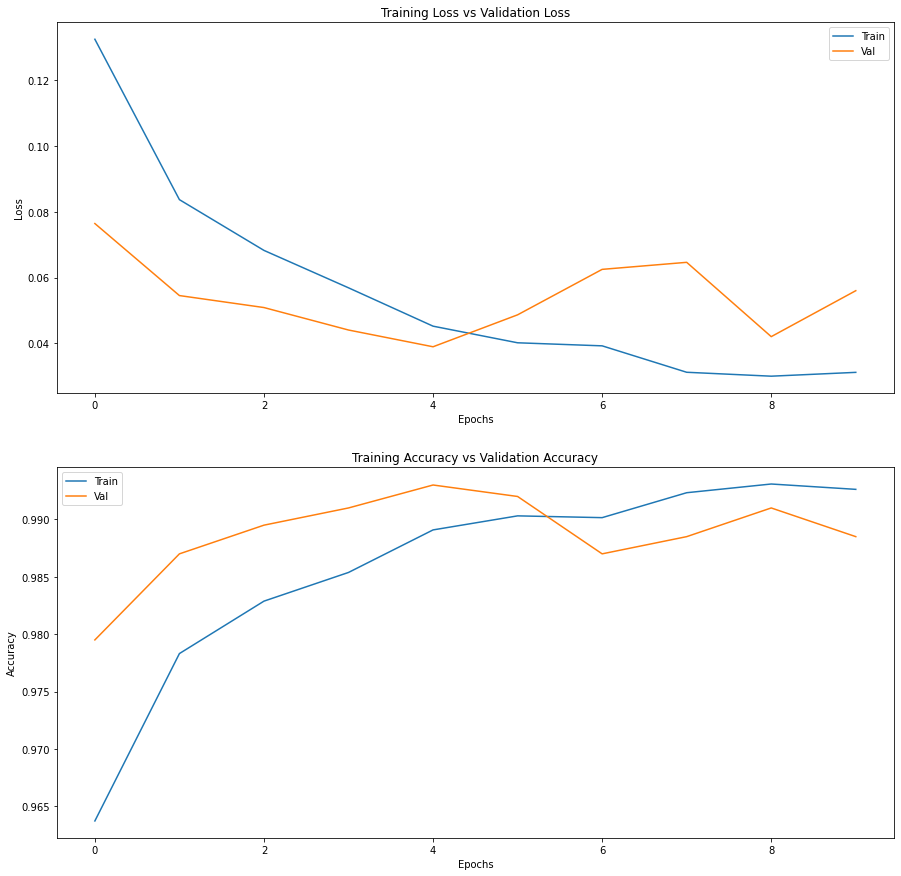

In [52]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [38]:
from tensorflow.keras.layers import Activation,MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import Sequential

In [39]:
from keras import layers

In [40]:
from tensorflow.keras.layers import Activation,MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import Sequential

In [41]:
from tensorflow.keras import datasets, layers, models, losses


In [42]:
mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255

#X_train = tf.expand_dims(X_train, axis=3, name=None)
#X_test = tf.expand_dims(X_test, axis=3, name=None)
#x_train = tf.repeat(X_train, 3, axis=3)
#x_test = tf.repeat(x_test, 3, axis=3)
#x_val = x_train[-2000:,:,:,:]
#y_val = y_train[-2000:]
#x_train = x_train[:-2000,:,:,:]
#y_train = y_train[:-2000]

In [43]:
X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)

In [44]:
#Repeat elements of input.
X_train = tf.repeat(X_train, 3, axis=3)
X_test = tf.repeat(X_test, 3, axis=3)

In [45]:
X_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]
X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [46]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)        

In [47]:
1024*4096 +4096

4198400

In [49]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
907/907 [==============================] - 64s 70ms/step - loss: 0.1325 - accuracy: 0.9637 - val_loss: 0.0764 - val_accuracy: 0.9795
Epoch 2/10
907/907 [==============================] - 63s 69ms/step - loss: 0.0837 - accuracy: 0.9783 - val_loss: 0.0545 - val_accuracy: 0.9870
Epoch 3/10
907/907 [==============================] - 63s 69ms/step - loss: 0.0683 - accuracy: 0.9829 - val_loss: 0.0509 - val_accuracy: 0.9895
Epoch 4/10
907/907 [==============================] - 63s 69ms/step - loss: 0.0569 - accuracy: 0.9854 - val_loss: 0.0440 - val_accuracy: 0.9910
Epoch 5/10
907/907 [==============================] - 63s 69ms/step - loss: 0.0452 - accuracy: 0.9891 - val_loss: 0.0389 - val_accuracy: 0.9930
Epoch 6/10
907/907 [==============================] - 63s 70ms/step - loss: 0.0401 - accuracy: 0.9903 - val_loss: 0.0487 - val_accuracy: 0.9920
Epoch 7/10
907/907 [==============================] - 63s 69ms/step - loss: 0.0392 - accuracy: 0.9902 - val_loss: 0.0625 - val_accuracy:

In [51]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 4s 14ms/step - loss: 0.0695 - accuracy: 0.9859


[0.06951890885829926, 0.9858999848365784]

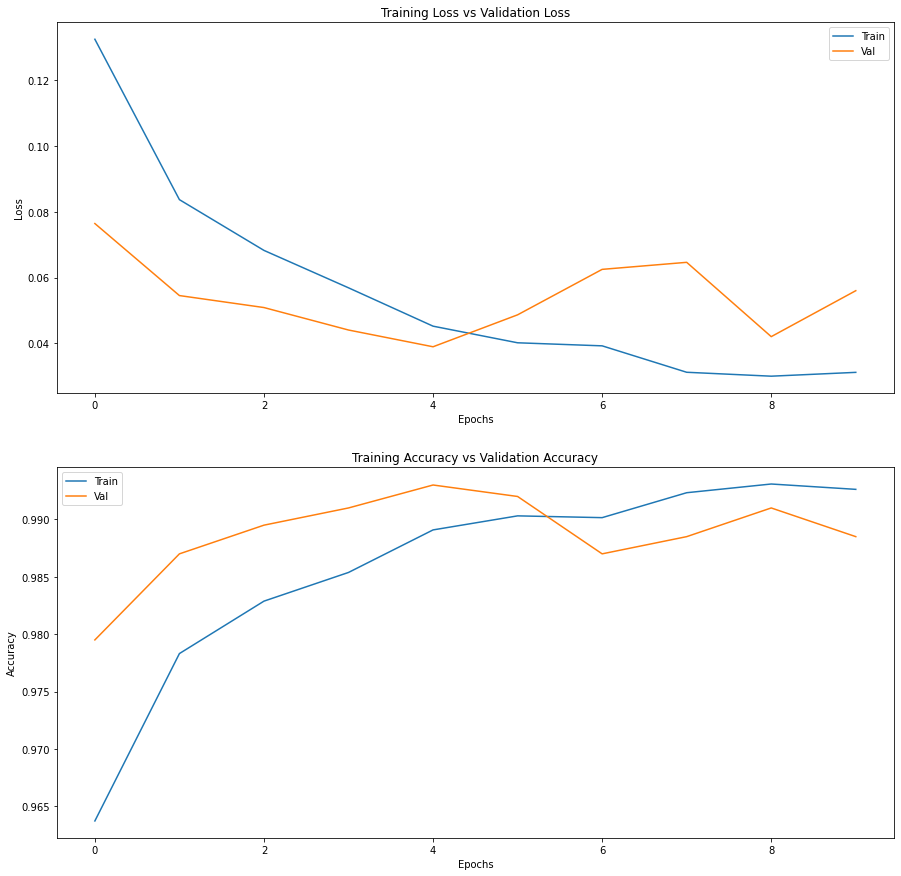

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])